<a href="https://colab.research.google.com/github/ChitranshS/HiringChallenge-1/blob/main/Hiring_Challenge_Final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we have to check whether we are connected to the right runtime or not.
## Please connect to the T4 runtime before moving ahead.


---



In [ ]:
#@title GPU available?
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-7ab87751-fe3b-2bff-5af0-af1b2cf59d44)


# We need to download approx 5-6 GBs in this step
*The next step will take some while as we need to download a whole bunch of libraries in a single go.*

---




In [ ]:
#@title Initial Library Setup (Please wait for some time) [5-7 minutes / One time Process]
import os, subprocess

def setup():
    install_cmds = [
        ['pip', 'install', 'gradio'],
        ['pip', 'install', 'open_clip_torch'],
        ['pip', 'install', 'clip-interrogator'],
        ['pip', 'install', 'together'],
        ['pip','install','gradio_client'],
        ['pip','install','rembg']

    ]
    for cmd in install_cmds:
        print(subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode('utf-8'))

setup()
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
import gradio as gr
from clip_interrogator import Config, Interrogator
from rembg import remove
config = Config()
config.clip_model_name = 'ViT-H-14/laion2b_s32b_b79k'  # Default clip model
config.caption_model_name = 'blip-large'  # Default caption model
ci = Interrogator(config)
os.mkdir("/content/uploads")
os.mkdir("/content/augment")
os.mkdir("/content/initial")




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.4/314.4 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.9 MB/s eta 0:00:00
     ━

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Loading caption model blip-large...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Loading CLIP model ViT-H-14/laion2b_s32b_b79k...


open_clip_pytorch_model.bin:   0%|          | 0.00/3.94G [00:00<?, ?B/s]

ViT-H-14_laion2b_s32b_b79k_artists.safetensors: 100%|██████████| 21.6M/21.6M [00:00<00:00, 354MB/s]
ViT-H-14_laion2b_s32b_b79k_flavors.safetensors: 100%|██████████| 207M/207M [00:00<00:00, 345MB/s]
ViT-H-14_laion2b_s32b_b79k_mediums.safetensors: 100%|██████████| 195k/195k [00:00<00:00, 26.8MB/s]
ViT-H-14_laion2b_s32b_b79k_movements.safetensors: 100%|██████████| 410k/410k [00:00<00:00, 56.7MB/s]
ViT-H-14_laion2b_s32b_b79k_trendings.safetensors: 100%|██████████| 148k/148k [00:00<00:00, 28.1MB/s]
ViT-H-14_laion2b_s32b_b79k_negative.safetensors: 100%|██████████| 84.2k/84.2k [00:00<00:00, 25.0MB/s]

Loaded CLIP model and data in 78.94 seconds.




---



In [ ]:
#@title CLIP Implementation
import random
from datetime import datetime
from rembg import remove
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
def image_to_prompt(image):
    ci.config.chunk_size =1024
    ci.config.flavor_intermediate_count =1024
    # ci.config.flavor_intermediate_count = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    image.save(f'/content/initial/{timestamp}.png', 'PNG')
    #@title Product Image Isolation
    image = image.convert('RGB')


    input_path = f'/content/initial/{timestamp}.png'
    output_path = f'/content/uploads/{timestamp}.png'

    input = Image.open(input_path)
    output = remove(input)
    output.save(output_path)
    image = Image.open(output_path)
    modes = ['best','fast','normal']
    mode = random.choice(modes)  # Set mode to 'fast' by default
    generated_prompt = ci.interrogate_fast(image)


    return generated_prompt




---



In [ ]:
#@title Upload Product Image (PNG/JPEG only for now) [15-20 seconds/ One time Process]
import gradio as gr
from PIL import Image


def prompt_tab():
    global stored_prompt  # Declare the stored_prompt variable as global

    with gr.Column():
        with gr.Row():
            image = gr.Image(type='pil', label="Image")
        prompt = gr.Textbox(label="CLIP Result")
        button = gr.Button("Apply CLIP")
        button.click(image_to_prompt, inputs=[image], outputs=[prompt])

            # Store the prompt value after rendering
        prompt.change(update_stored_prompt, inputs=[prompt], outputs=[])



def update_stored_prompt(prompt):
    global stored_prompt
    stored_prompt = prompt  # Assign the prompt value to the stored_prompt variable

with gr.Blocks() as ui:
    with gr.Tab("CLIP Analysis"):
        stored_prompt = ""  # Initialize the stored_prompt variable
        prompt_tab()
    ui.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7c0616d0a847aeb569.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)




---



In [ ]:
#@title CLIP Analysis keyowrds
stored_prompt

'a close up of a camera with a lens on a black background, 8 0 s camera, medium format camera, 35mm camera, 3 5 mm camera, 5 0 mm camera, film camera style, film camera, 35mm film camera, medium format digital camera, medium format, detailed medium format photo, medium format photography, tri - x pan stock'

In [ ]:
#@title Enter some keywords about the product here (3-5 keywords max) (Name,Place/User,Usage/Feature){ run: "auto", display-mode: "form" }
user_prompt =  'Computer Mouse , on a table , Hand , scroll'# @param {type:"string"}
# @markdown This parameter is very important so write wisely

# background_elements =  ''# @param {type:"string"}



---



In [ ]:
 #@title Product Image Isolation Extras Commented
# from rembg import remove
# from PIL import Image

# input_path = f'/content/initial/{timestamp}.png'
# output_path = f'/content/uploads/{timestamp}.png'

# input = Image.open(input_path)
# output = remove(input)
# output.save(output_path)



---



In [ ]:
#@title Generate Dynamic Prompt
import os
import random
import together
from google.colab import userdata


together.api_key = userdata.get('together-ai')
response = together.Complete.create(
    model="meta-llama/Llama-3-70b-chat-hf",
    prompt=f"""
    IMPORTANT INSTRUCTIONS:
    ONLY REPLY AFTER READING THE ENTIRE TEXT NOT BEFORE THAT.
    ONLY GIVE THE PROMPT TEXT NOTHING ELSE. THE PROMPT SHOULD BE COMPLETE AND LESS THAN 50 WORDS.
    DON'T REPEAT THE PROMPT IN A SINGLE REPLY.
    STOP AND LEAVE BLANK SPACES WHEN THE PROMPT IS OVER.

    GOAL:
    I will give you a product description i.e. {stored_prompt}
    Identify entities which will look appealing and aesthetic in a marketing campaign studio where the product is :{user_prompt}

    TASK:
    Now your task is to generate 6 keywords about the product and three concise and unique environmental physical description containing the terms  "{user_prompt}". The environmental physical descriptions should be perfect for their use in product photography and marketing environment.Each environmental physical description should be unique and very different from each other.

    REPLY FORMAT:
    'Start the from directly from the keywords and don't use fullstops when giving keywords use comma'
    Keywords:
    Environmental physical description:
      ENV1:
      Additional Elements 1:
      ENV2:
      Additional Elements 2:
      ENV3:
      Additional Elements 3:
     """,
    temperature = round(random.uniform(1, 2),1),
    top_k = 50,
    max_tokens = 300,
    top_p = 0.7,
    repetition_penalty = 1
)

<ipython-input-266-a5de38fe506d>:9: DeprecationWarning: Call to deprecated function create.
  response = together.Complete.create(




---



In [ ]:
#@title Enhanced and Descriptive Keywords
generation_prompt = response['choices'][0]['text']
generation_prompt = generation_prompt.replace('\n', ' ')
generation_prompt

" (Don't add any blank spaces at the end of your reply)assistant  Keywords: Computer Mouse, Hand, Scroll, Ergonomic, Precise, Control  Environmental physical description: ENV1: Morning sunlight illuminates a minimalist wooden table, where a hand gently cradles the computer mouse, emphasizing ergonomic design and precision control.  Additional Elements 1: Coffee cup, laptop, and papers in the background, with a slight blur to focus attention on the product.  ENV2: A dark-stained wooden table is adorned with a hand placing the computer mouse on a stack of vintage computer parts, highlighting its modernity and precision scroll.  Additional Elements 2: Retro computer keyboard, motherboard, and wires surrounding the product, with a subtle gradient effect to evoke nostalgia.  ENV3: Against a clean white background, a hand is seen scrolling on the computer mouse, placed on a sleek glass table, showcasing its sleek design and smooth functionality.  Additional Elements 3: A minimalist desk lamp

In [ ]:
#@title Some debugging code
env_paragraphs = sent_tokenize(generation_prompt)
env_desc = [env_paragraphs[i] + env_paragraphs[i+1] for i in range(0, len(env_paragraphs)-1, 2)]
# env_desc = generation_prompt.split('.')
env_desc[2]

"ENV3: Against a clean white background, a hand is seen scrolling on the computer mouse, placed on a sleek glass table, showcasing its sleek design and smooth functionality.Additional Elements 3: A minimalist desk lamp, a few papers, and a modern laptop in the background, with a shallow depth of field to focus attention on the product's scrolling feature.assistant  Let me try again."

In [ ]:
#@title Don't Run Just some commented code
# !pip install gradio_client
# # !pip install pytesseract
# round(random.uniform(1, 2),1)
# # Install Tesseract
# !sudo apt install tesseract-ocr

# # Install pytesseract, a Python wrapper for Tesseract
# !pip install pytesseract
# import pytesseract
# from PIL import Image
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# imageSent = Image.open('/content/uploads/product3.png')
# image_cv = np.array(imageSent)

# # Convert RGB to BGR (OpenCV uses BGR by default)

# # Apply Canny edge detection
# edges = cv2.Canny(image_cv, 100, 1100)  # These thresholds can be adjusted

# # Convert back to PIL image to use any PIL functionalities further or just display using matplotlib
# edges_image = Image.fromarray(edges)
# extracted_text = pytesseract.image_to_string(edges)
# plt.imshow(edges_image)
# print(extracted_text)



---



In [ ]:
#@title Enter Rotation Range for product augmentation { run: "auto", display-mode: "form" }
min_angle = -10 #@param {type:"integer"}
max_angle = 10 #@param {type:"integer"}
print("Rotation will be anywhere applied between:", min_angle, "and", max_angle, "degrees")
print("Total Number of environments:" , len(env_desc))

Rotation will be anywhere applied between: -10 and 10 degrees
Total Number of environments: 4


In [ ]:
#@title Generate Product Background [30-60 seconds] {display-mode: "form" }
# @markdown Please look in the above statement to see that total number of environments available for generation. Total env = 4 => env_number = (0,1,2,3)
env_number = 3 #@param {type:"integer"}



from gradio_client import Client
from PIL import Image

client = Client("https://hysts-controlnet-v1-1.hf.space/")
imageSent = Image.open(f'/content/uploads/{timestamp}.png')
rotated_image = imageSent.rotate(random.uniform(min_angle,max_angle))
# rotated_image = rotated_image.transpose(Image.FLIP_LEFT_RIGHT)

save_path = f'/content/augment/{timestamp}.png'  # Replace with your output file path and desired format
rotated_image.save(save_path, 'PNG')

result = client.predict(
		f"/content/augment/{timestamp}.png",	# str (filepath on your computer (or URL) of image) in 'parameter_8' Image component
		env_desc[env_number],	# str  in 'Prompt' Textbox component
		f"best quality, extremely detailed, ultra-realistic , Marketing , Product photography, enhanced , Multiple angles, on a surface",	# str  in 'Additional prompt' Textbox component
		"longbody, lowres,text in generation ,bad anatomy,incomplete fingers, bad hands, missing fingers, floating in air, extra digit, fewer digits, cropped, worst quality, low quality,dull colors",	# str  in 'Negative prompt' Textbox component
		1,	# int | float (numeric value between 1 and 1) in 'Number of images' Slider component
		720.00,	# int | float (numeric value between 256 and 768) in 'Image resolution' Slider component
		random.randint(30,96),	# int | float (numeric value between 1 and 100) in 'Number of steps' Slider component
		round(random.uniform(10,28),1),	# int | float (numeric value between 0.1 and 30.0) in 'Guidance scale' Slider component
		random.randint(0,2232232),	# int | float (numeric value between 0 and 2147483647) in 'Seed' Slider component
		100,	# int | float (numeric value between 1 and 255) in 'Canny low threshold' Slider component
		200,	# int | float (numeric value between 1 and 255) in 'Canny high threshold' Slider component
		api_name="/canny"
)
print(result)

Loaded as API: https://hysts-controlnet-v1-1.hf.space/ ✔
/tmp/gradio/2c4beadd-4c3c-4c6b-b000-efd1c6fcfe72




---



In [ ]:
#@title Fetching the directory names
import os
for dirpath, dirnames, filenames in os.walk(result):
  if dirnames:
   directories = dirnames
   break
result

'/tmp/gradio/2c4beadd-4c3c-4c6b-b000-efd1c6fcfe72'



---



In [ ]:
#@title Image Resizing
from PIL import Image

# Load the image
imageResize = Image.open(f'../content/augment/{timestamp}.png')
background1 = Image.open(f'../{result}/{directories[0]}/image.png')


# Specify the new dimensions
new_width , new_height = background1.size

# Resize the image
resized_image = imageResize.resize((new_width, new_height), Image.LANCZOS)

# Save the resized image
resized_image.save('resized_image.png')

# Display the resized image (optional)
resized_image.show()




---



In [ ]:
#@title Using the generated image and the mask

from PIL import Image

# Open the background and overlay images
background1 = Image.open(f'../{result}/{directories[0]}/image.png')
background2 = Image.open(f'../{result}/{directories[1]}/image.png')
overlay = Image.open('../content/resized_image.png')

# You might need to resize the overlay or use it as is, depending on the need
# For example, resize overlay to match background's size
# overlay = overlay.resize(background.size, Image.ANTIALIAS)
print("Background mode:", background1.mode)
print("Background mode:", background2.mode)
print("Overlay mode:", overlay.mode)
# Position the overlay at the desired position (top-left corner in this example)
# You can change (0, 0) to whatever coordinates you want
position = (0, 0)  # Position can be changed based on where you want to place the overlay
if background1.mode != 'RGBA':
    background = background1.convert('RGBA')
if background2.mode != 'RGBA':
    background = background2.convert('RGBA')
if overlay.mode != 'RGBA':
    overlay = overlay.convert('RGBA')
# Assuming both images are now RGBA
# Extract the alpha channel from the overlay
alpha_mask = overlay.split()[3]

# Paste the overlay using the alpha channel as a mask
background1.paste(overlay, (0, 0), alpha_mask)  # Adjust position as needed

# Save or show the result
background1.save('output_image1.png')  # Save as PNG to preserve transparency in the output
background1.show()

background2.paste(overlay, (0, 0), alpha_mask)  # Adjust position as needed

# Save or show the result
background2.save('output_image2.png')  # Save as PNG to preserve transparency in the output
background2.show()

Background mode: RGB
Background mode: RGB
Overlay mode: RGBA




---



### Now two images will be there output_image1.png and output_image2.png
One of them is the canny mask and other is the final product.



---



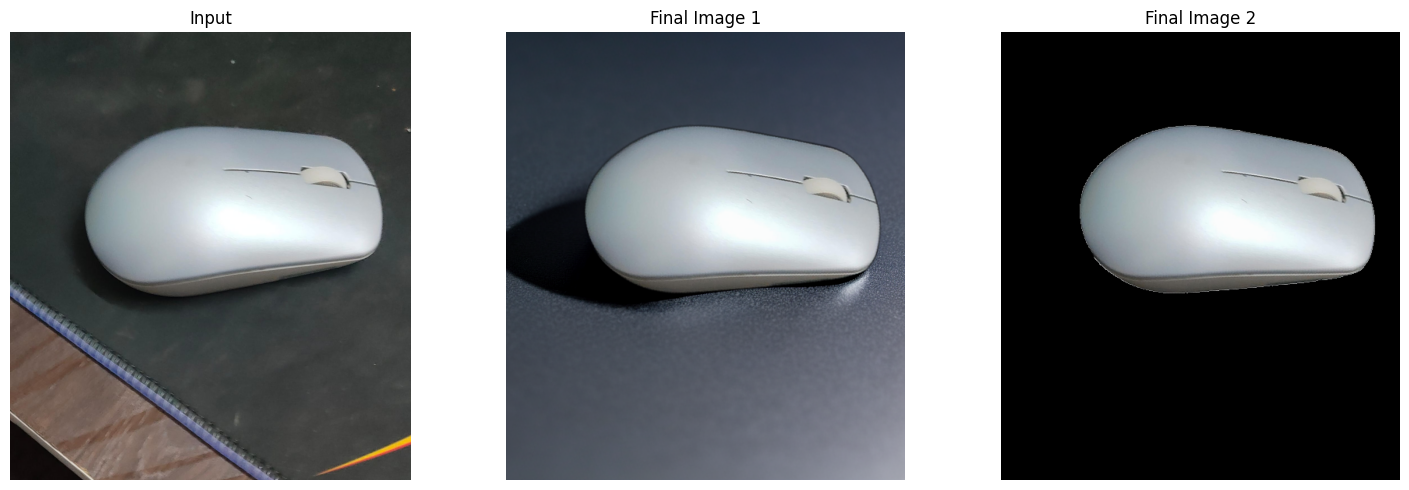

In [ ]:
#@title Output here
import matplotlib.pyplot as plt
import cv2

# Load the images
image1 = cv2.imread(f"../content/initial/{timestamp}.png")
image2 = cv2.imread("../content/output_image1.png")
image3 = cv2.imread("../content/output_image2.png")
# image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
# image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
# image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

# Create a figure and axis object
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each image
axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[0].set_title("Input")
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[1].set_title("Final Image 1")
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
axes[2].set_title("Final Image 2")
axes[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()


# Debugging Section / Instant Idea Trials

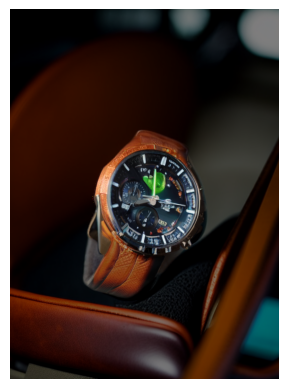

In [ ]:
# @title Commented Code
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load background and overlay images
background = cv2.imread(f'../{result}/{directories[0]}/image.png')
overlay = cv2.imread('../content/resized_image.png')

# Resize overlay image to match background dimensions
overlay = cv2.resize(overlay, (background.shape[1], background.shape[0]))

# Convert images to float32 for calculations
background_float = background.astype(np.float32) / 255.0
overlay_float = overlay.astype(np.float32) / 255.0

# Define opacity factor (adjust as needed)
alpha = 0.5

# Blend overlay with background based on opacity
blended_image = cv2.addWeighted(background_float, 1 - alpha, overlay_float, alpha, 0)

# Adjust highlights
highlight_mask = blended_image > 1.0
blended_image[highlight_mask] = 1.0

# Adjust shadows
shadow_mask = blended_image < 0.0
blended_image[shadow_mask] = 0.0

# Convert blended image back to uint8 format (0-255)
blended_image_uint8 = (blended_image * 255.0).astype(np.uint8)
# Display adjusted overlay image
plt.imshow(blended_image_uint8)
aassa = cv2.cvtColor(blended_image_uint8, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(aassa)


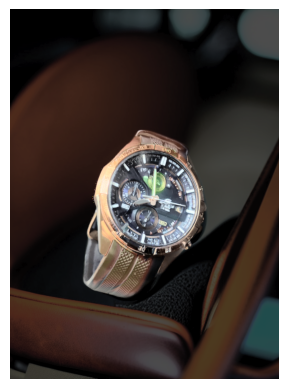

In [ ]:
#@title More commented code
import cv2

# Load the images
image2 = cv2.imread(f'../{result}/{directories[0]}/image.png')
image1 = cv2.imread('../content/resized_image.png')

# Convert images to LAB color space for better handling of lighting
image1_lab = cv2.cvtColor(image1, cv2.COLOR_BGR2LAB)
image2_lab = cv2.cvtColor(image2, cv2.COLOR_BGR2LAB)

# Adjust the lighting conditions using histogram equalization
image1_lab[:,:,0] = cv2.equalizeHist(image1_lab[:,:,0])
image2_lab[:,:,0] = cv2.equalizeHist(image2_lab[:,:,0])

# Convert images back to BGR color space
image1_equalized = cv2.cvtColor(image1_lab, cv2.COLOR_LAB2BGR)
image2_equalized = cv2.cvtColor(image2_lab, cv2.COLOR_LAB2BGR)

# Blend the images (you can adjust the alpha value for different blending effects)
alpha = 0.7
blended_image = cv2.addWeighted(image1_equalized, alpha, image2_equalized, 1 - alpha, 0)

plt.axis("off")# Display or save the blended image
plt.imshow(blended_image)
aassa = cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB)
plt.imshow(aassa)
